In [ ]:
!pip install rouge-score


  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=128a0977125a88240d7fafef422528dc508f6c151998969d6919bcd98f67c512
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score


In [ ]:
from rouge_score import rouge_scorer
import pandas as pd

# Caminho do arquivo CSV de entrada e saída
input_csv_path = "/content/sample_data/4_corrected_code_full_before_index.csv"
output_csv_path = "/content/sample_data/4_corrected_code_full_after_index_with_rouge.csv"

# Carregar o CSV com os dados
df = pd.read_csv(input_csv_path)

# Função para calcular o ROUGE score
def calculate_rouge(row):
    source_code = row['SourceCode']
    code_fix = row['Code Fix']

    if pd.isna(source_code) or pd.isna(code_fix):
        return "", "", ""

    # Criar o avaliador de ROUGE
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    scores = scorer.score(source_code, code_fix)

    # Extrair os F1 scores para cada métrica
    rouge1 = round(scores['rouge1'].fmeasure, 4)
    rouge2 = round(scores['rouge2'].fmeasure, 4)
    rougeL = round(scores['rougeL'].fmeasure, 4)

    return rouge1, rouge2, rougeL

# Aplicar a função e criar novas colunas no DataFrame
df[['ROUGE-1', 'ROUGE-2', 'ROUGE-L']] = df.apply(
    lambda row: pd.Series(calculate_rouge(row)), axis=1
)

# Salvar o arquivo atualizado com os scores de ROUGE
df.to_csv(output_csv_path, index=False)

print(f"Arquivo atualizado salvo em: {output_csv_path}")


Arquivo atualizado salvo em: /content/sample_data/4_corrected_code_full_after_index_with_rouge.csv


Gráfico com linhas de conexão

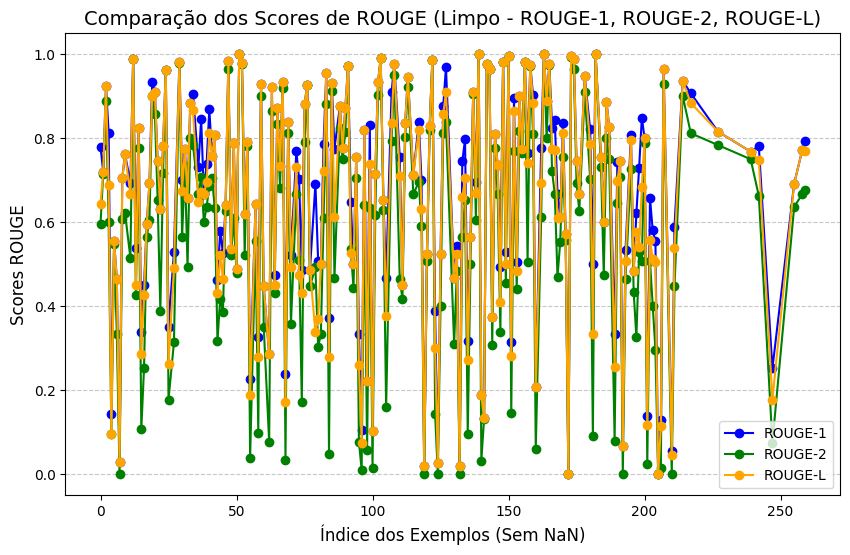

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o CSV atualizado com os scores de ROUGE
output_csv_path = "/content/sample_data/4_corrected_code_full_after_index_with_rouge.csv"
df = pd.read_csv(output_csv_path)

# Remover valores vazios (NaN) das colunas de ROUGE
df_clean = df[['ROUGE-1', 'ROUGE-2', 'ROUGE-L']].dropna()

# Criar um gráfico de linhas para comparar ROUGE-1, ROUGE-2 e ROUGE-L
plt.figure(figsize=(10, 6))

# Plotando cada métrica apenas com valores válidos
plt.plot(df_clean.index, df_clean['ROUGE-1'], marker='o', label='ROUGE-1', color='blue')
plt.plot(df_clean.index, df_clean['ROUGE-2'], marker='o', label='ROUGE-2', color='green')
plt.plot(df_clean.index, df_clean['ROUGE-L'], marker='o', label='ROUGE-L', color='orange')

# Adicionando detalhes ao gráfico
plt.title("Comparação dos Scores de ROUGE (Limpo - ROUGE-1, ROUGE-2, ROUGE-L)", fontsize=14)
plt.xlabel("Índice dos Exemplos (Sem NaN)", fontsize=12)
plt.ylabel("Scores ROUGE", fontsize=12)
plt.legend(loc="lower right")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibindo o gráfico
plt.show()


Gráfico sem linhas de conexão

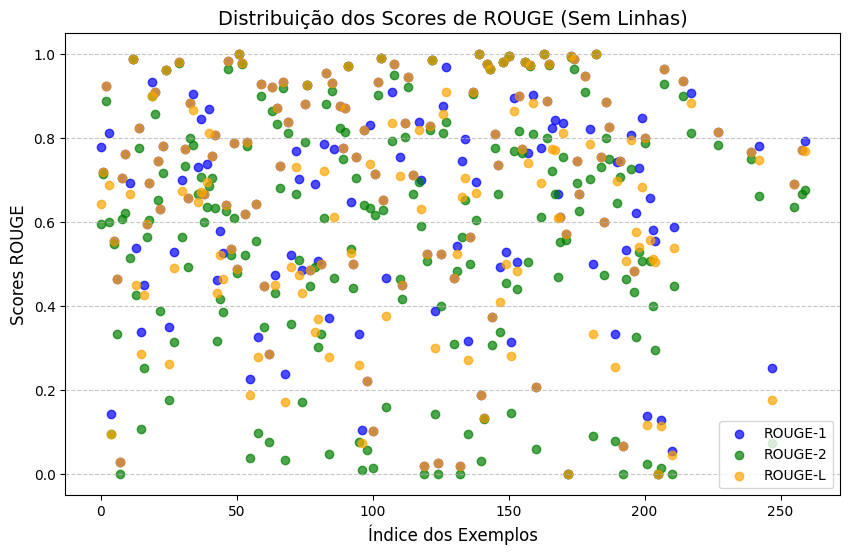

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o CSV atualizado com os scores de ROUGE
output_csv_path = "/content/sample_data/4_corrected_code_full_after_index_with_rouge.csv"
df = pd.read_csv(output_csv_path)

# Remover valores vazios (NaN) das colunas de ROUGE
df_clean = df[['ROUGE-1', 'ROUGE-2', 'ROUGE-L']].dropna()

# Criar gráfico de dispersão sem linhas de conexão
plt.figure(figsize=(10, 6))

# Plotando cada métrica apenas com valores válidos (sem linhas conectando os pontos)
plt.scatter(df_clean.index, df_clean['ROUGE-1'], label='ROUGE-1', color='blue', alpha=0.7)
#plt.scatter(df_clean.index, df_clean['ROUGE-2'], label='ROUGE-2', color='green', alpha=0.7)
#plt.scatter(df_clean.index, df_clean['ROUGE-L'], label='ROUGE-L', color='orange', alpha=0.7)

# Adicionando detalhes ao gráfico
plt.title("Distribuição dos Scores de ROUGE (Sem Linhas)", fontsize=14)
plt.xlabel("Índice dos Exemplos", fontsize=12)
plt.ylabel("Scores ROUGE", fontsize=12)
plt.legend(loc="lower right")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibindo o gráfico
plt.show()

